#Введение
В данной практике разберем пару примеров геокодинга.

Сначала рассмотрим самую популярную библиотеку `geopy`, далее попробуем использовать геокодер `Nominatium`, бесплатный `Yandex`, и в завершении посмотрим, как проводить геокодинг через GeoPandas (Да, снова повторимся, и скажем, что более подробно с GeoPandas-ом будем знакомиться чуть позже, а предварительно по маленькому кусочку будем смотреть на полезные инструменты данной библиотеки).

# Импорт необходимых библиотек

In [13]:
import requests
import json
from geopy.geocoders import Nominatim
from geopy.geocoders import Yandex
import pandas as pd
import geopandas as gpd

# Geopy

Как говорилось ранее с помощью `geopy` можно осуществлять геокодирование. Но важно помнить, что геокодирование предоставляется рядом различных сервисов, которые никак не связаны с `geopy`. Эти сервисы предоставляют API, которые может использовать любой желающий, а `geopy` - это просто библиотека, которая предоставляет эти реализации для множества различных сервисов в одном пакете.Данная библиотека собрала большинство геокодеров. Полный список геокодеров можно посмотреть [тут](https://geopy.readthedocs.io/en/stable/#module-geopy.geocoders)

В примерах ниже показано прямое и обратно геокодирование с Nominatim. Nominatim -это геокодер для данных с OpenStreetMap.

Прямое геокодирование. На вход подаем адрес, на выходе получаем координаты

In [21]:
location_n.altitude

0.0

In [17]:
from tqdm.auto import trange
from functools import lru_cache

@lru_cache(None)
def gecode(x):
  return geolocator_n.geocode(x)

for _ in trange(100):
  location_n = gecode("Санкт-Петербург")

  0%|          | 0/100 [00:00<?, ?it/s]

In [22]:
# Инициализируем Nominatim API
geolocator_n = Nominatim(user_agent="geopyExample")

# Геокодинг адреса
location_n = geolocator_n.geocode("ул. Достоевского 38")

# Выведем широту, долготу
print("Широта:", location_n.latitude)
print("Долгота:", location_n.longitude)

Широта: 59.9226989
Долгота: 30.346094880025056


---

Обратное геокодирование. На вход подаем координаты, на выходе получаем адрес

In [23]:
# Геокодинг координат
location_n = geolocator_n.reverse("55.7339688, 37.5884817")

# Выведем адрес
print(location_n.address)

# Выведем сырые данные
print(location_n.raw)

Яндекс, 16, улица Льва Толстого, район Хамовники, Москва, Центральный федеральный округ, 119034, Россия
{'place_id': 181313633, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://osm.org/copyright', 'osm_type': 'node', 'osm_id': 4066982689, 'lat': '55.7339688', 'lon': '37.5884817', 'class': 'office', 'type': 'company', 'place_rank': 30, 'importance': 0.5760477525309389, 'addresstype': 'office', 'name': 'Яндекс', 'display_name': 'Яндекс, 16, улица Льва Толстого, район Хамовники, Москва, Центральный федеральный округ, 119034, Россия', 'address': {'office': 'Яндекс', 'house_number': '16', 'road': 'улица Льва Толстого', 'suburb': 'район Хамовники', 'city': 'Москва', 'state': 'Москва', 'ISO3166-2-lvl4': 'RU-MOW', 'region': 'Центральный федеральный округ', 'postcode': '119034', 'country': 'Россия', 'country_code': 'ru'}, 'boundingbox': ['55.7339188', '55.7340188', '37.5884317', '37.5885317']}


Как видно сырые данные содержат еще много полезной информации

# Бесплатный Yandex

Перейдем к бесплатному сервису геокодинга от Yandex.

Бесплатно доступно до 1000 запросов в сутки. Более подробно с ценовой политикой можно ознакомиться [тут](https://yandex.ru/maps-api/products/geocoder-api#price). Бесплатное использование возможно при соблюдении определенных условий. Полный перечень условий находится [тут](https://yandex.ru/dev/commercial/doc/ru/?from=mapsapi).

Документация [тут](https://yandex.com/dev/geocode/doc/ru/)

От себя добавлю, что регистрация и получений API-ключа занимает максимум 5 минут и пару кликов.

Рассмотрим два варианта использования сервиса:
* через geopy
* через посылку http запросов

## Через geopy

Прямое геокодирование

In [ ]:
# Инициализируем Yandex API
# Вам нужно будет подставить свой API-ключ
geolocator_y = Yandex(api_key='YOUR_API_KEY')

# Геокодинг адреса
location_y = geolocator_y.geocode("ул. Льва Толстого, 16, Москва",
                              lang='ru_RU') # язык тоже обязательный параметр

# Выведем широту, долготу
print("Широта:", location_y.latitude)
print("Долгота:", location_y.longitude)

Широта: 55.733974
Долгота: 37.587093


Видно что чуть-чуть отличаются координаты

---

Обратное геокодирование

In [24]:
# Геокодинг координат
location_y = geolocator_y.reverse("55.733974, 37.587093")

# Выведем адрес
print(location_y.address)

# Выведем сырые данные
print(location_y.raw)

NameError: name 'geolocator_y' is not defined

## Через http-запросы

Чтобы отправить http-запрос воспользуемся библиотекой `reqrequests`

In [ ]:
url = "https://geocode-maps.yandex.ru/1.x/"


# отправим тот же адрес
params = {'apikey': 'YOUR_API_KEY',
          'geocode': 'ул. Льва Толстого, 16, Москва',
          'lang': 'ru_RU',
          'format':'json'
          }

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) \
    AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

with requests.Session() as session:
    response = session.get(url, params=params, headers=headers)


data = json.loads(response.text)
formatted_address = data["response"]["GeoObjectCollection"]["featureMember"]\
                        [0]["GeoObject"]["Point"]['pos']

# Выводим координаты
print(formatted_address)

37.587093 55.733974


Обратное геокодирование выполняется аналогично, единственно нужно будет изменить `formatted_address`, согласно структуре json-ответа.

# Geocoding via GeoPandas

Для геокодинга через ГеоПандас создадим маленький датафрейм и воспользуемся знакомым Nominatium для геокодинга

In [25]:
# Создаем датафрейм
df = pd.DataFrame({'addr': 'ул. Льва Толстого, 16, Москва'}, [0])
df.head()

,addr
0,"ул. Льва Толстого, 16, Москва"


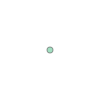

In [31]:
geocoded_df['geometry'][0]

In [26]:
geocoded_df = gpd.tools.geocode(
    # указываем колонку с адресами для геокодинга
    df["addr"],
    # Инициализируем Nominatium
    provider="nominatim",
    user_agent="geopyExample",
    # Поиск адреса — довольно дорогостоящая операция. Вот почему иногда
    # общедоступному и бесплатному серверу Nominatim требуется немного больше
    # времени для ответа. Ставим 10 сек ожидания ответа
    timeout=10
)
geocoded_df.head()

,geometry,address
0,POINT (37.58848 55.73397),"Яндекс, 16, улица Льва Толстого, район Хамовни..."


На выходе получили готовый геодатафрейм с полным адресом и координатами. Очень удобно, согласитесь ?

Обратное геокодирование выполняется аналогично.